In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

#Reading Data
df = pd.read_excel('Merged_pollution_dataset - wo 2016 17.xlsx')
df_bbsr = df[(df['City/Town/Village/Area'] == 'Bhubaneswar') | (df['City/Town/Village/Area'] == 'Bhubaneshwar')]

df_bbsr.dtypes

df_bbsr['RSPM/PM10'] = pd.to_numeric(df_bbsr['RSPM/PM10'], errors='coerce')
df_bbsr['SO2'] = pd.to_numeric(df_bbsr['SO2'], errors='coerce')
df_bbsr['NO2'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')
df_bbsr['SPM'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')

df_bbsr.dtypes

#Data Preprocessing
df_bbsr['Location of Monitoring Station'].replace('SPCB Building, Bhubaneshwar', 'OSPCB Bldg',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Capital Police Station, Bhubaneshwar', 'Capital Police Stn.',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('IRC Vilage, Bhubaneshwar', 'IRC',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Chandrasekharpur. Bhubneswar', 'Chandrasekharpur',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Water works, Palasuni, Bhubneswar', 'Palasuni',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Patrapada, Bhubneswar', 'Patrapada',inplace=True)

df_bbsr_ospcb = df_bbsr[(df_bbsr['Location of Monitoring Station'] == 'OSPCB Bldg')]

#Initial Analysis
#Checking the datatypes of various columns
df_bbsr_ospcb.dtypes

#Converting object to Datetime
df_bbsr_ospcb.reset_index(inplace = True)
df_bbsr_ospcb = df_bbsr_ospcb.drop(['index'], axis = 1)
df_bbsr_ospcb['Sampling Date'] = pd.to_datetime(df_bbsr_ospcb['Sampling Date'], format='%Y-%m-%d %H:%M')
df_bbsr_ospcb['Sampling Date'] = pd.to_datetime(df_bbsr_ospcb['Sampling Date'], format='%Y-%m-%d %H:%M')


df_bbsr_ospcb.dtypes

#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

print("SUCCESS!!")
df_bbsr_ospcb.head()

SUCCESS!!


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,322.0,2004-01-01,Odisha,Bhubaneswar,OSPCB Bldg,Odisha State Pollution Control Board,"Residential, Rural and other Areas",2.0,21.08,123.67,21.08
1,322.0,2004-02-01,Odisha,Bhubaneswar,OSPCB Bldg,Odisha State Pollution Control Board,"Residential, Rural and other Areas",2.5,19.83,88.67,19.83
2,322.0,2004-03-01,Odisha,Bhubaneswar,OSPCB Bldg,Odisha State Pollution Control Board,"Residential, Rural and other Areas",2.0,9.50,122.33,9.50
3,322.0,2004-04-01,Odisha,Bhubaneswar,OSPCB Bldg,Odisha State Pollution Control Board,"Residential, Rural and other Areas",2.0,12.75,106.00,12.75
4,322.0,2004-05-01,Odisha,Bhubaneswar,OSPCB Bldg,Odisha State Pollution Control Board,"Residential, Rural and other Areas",2.0,13.33,121.33,13.33


In [2]:
#Index Sorting
df_bbsr_ospcb = df_bbsr_ospcb.set_index(df_bbsr_ospcb['Sampling Date'])
df_bbsr_ospcb = df_bbsr_ospcb.sort_index()
# plt.plot(df_bbsr_cps['NO2'])

#Separating Year, Month, Day and Day of Week
df_bbsr_ospcb['year'] = df_bbsr_ospcb['Sampling Date'].dt.year 
df_bbsr_ospcb['month'] = df_bbsr_ospcb['Sampling Date'].dt.month 
df_bbsr_ospcb['day'] = df_bbsr_ospcb['Sampling Date'].dt.day
df_bbsr_ospcb['day_of_week'] = df_bbsr_ospcb['Sampling Date'].dt.dayofweek

#Determining Weekend
def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df_bbsr_ospcb['weekend'] = df_bbsr_ospcb['day_of_week'].apply(weekend)

#Outlier Removal
mean_ospcb = df_bbsr_ospcb['SPM'].mean()
std_dev_ospcb = df_bbsr_ospcb['SPM'].std() #Standard Deviation of SPM

df_bbsr_ospcb['SPM'][df_bbsr_ospcb['SPM'] > (mean_ospcb + 2.5*std_dev_ospcb)] = np.nan   #Replacing Outlier with "nan"
plt.plot(df_bbsr_ospcb['SPM'])
df_bbsr_ospcb.isna().sum()

df_bbsr_ospcb['SPM'] = df_bbsr_ospcb['SPM'].fillna(method = 'backfill')   #Replacing "nan" with the previous values

#Dummy Encoding
df_bbsr_ospcb = pd.get_dummies( df_bbsr_ospcb, columns = ['month', 'day_of_week'] )

print("SUCCESS!!")

SUCCESS!!


In [3]:
#Creating Multi-features
xf = df_bbsr_ospcb[['weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'SPM']]

xf.head()


,weekend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,SPM
Sampling Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,21.08
2004-01-02,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15.20
2004-01-03,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6.33
2004-01-04,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.25
2004-01-05,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,8.92


In [4]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 100, 21

mean_spm = xf['SPM'].mean()
std_spm = xf['SPM'].std()

#Feature Scaling
cols = ['weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'SPM']

for field in cols:
    xf[field] = (xf[field] - xf[field].mean())/xf[field].std()


X, y = split_sequences(xf.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

X = np.delete(X, X.shape[0] - 1, 0)
y = np.delete(y, y.shape[0] - 1, 0)

# X = X.reshape(X.shape[0], X.shape[1], 1)
# y = y.reshape(y.shape[0], y.shape[1], 1)

n_features = X.shape[2]

print("SUCCESS!!")

SUCCESS!!


In [12]:
%tensorflow_version 1.x
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
# from keras.layers import GRU
from keras.layers.normalization import BatchNormalization
from keras.layers import Bidirectional


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
# model.add(BatchNormalization())

model.add(Conv1D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# model.add(Flatten())
# model.add(Dense(50, activation='relu'))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

print('SUCCESS!!')

TensorFlow 1.x selected.


Using TensorFlow backend.







SUCCESS!!


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
from tensorflow.python.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=2000)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2000





 - 8s - loss: 0.8788
Epoch 2/2000
 - 4s - loss: 0.6255
Epoch 3/2000
 - 4s - loss: 0.5673
Epoch 4/2000
 - 4s - loss: 0.5445
Epoch 5/2000
 - 4s - loss: 0.5283
Epoch 6/2000
 - 4s - loss: 0.5054
Epoch 7/2000
 - 4s - loss: 0.4929
Epoch 8/2000
 - 4s - loss: 0.4801
Epoch 9/2000
 - 4s - loss: 0.4678
Epoch 10/2000
 - 4s - loss: 0.4639
Epoch 11/2000
 - 4s - loss: 0.4498
Epoch 12/2000
 - 4s - loss: 0.4489
Epoch 13/2000
 - 4s - loss: 0.4402
Epoch 14/2000
 - 4s - loss: 0.4356
Epoch 15/2000
 - 4s - loss: 0.4291
Epoch 16/2000
 - 4s - loss: 0.4240
Epoch 17/2000
 - 4s - loss: 0.4194
Epoch 18/2000
 - 4s - loss: 0.4151
Epoch 19/2000
 - 4s - loss: 0.4163
Epoch 20/2000
 - 4s - loss: 0.4139
Epoch 21/2000
 - 4s - loss: 0.4079
Epoch 22/2000
 - 4s - loss: 0.4056
Epoch 23/2000
 - 4s - loss: 0.4052
Epoch 24/2000
 - 4s - loss: 0.4002
Epoch 25/2000
 - 4s - loss: 0.3974
Epoch 26/2000
 - 4s - loss: 0.39

In [15]:
from sklearn.externals import joblib 
path = "/content/drive/My Drive/model_cnnbilstm_spm_OSPCB.pkl"  
# Save the model as a pickle in a file 
joblib.dump(model, path)

['/content/drive/My Drive/model_cnnbilstm_spm_OSPCB.pkl']

In [5]:
from sklearn.externals import joblib
model = joblib.load('F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_spm_OSPCB.pkl')

Using TensorFlow backend.


In [6]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_spm)+mean_spm)
print((y_test*std_spm)+mean_spm)

[ 20.98676682  13.11258698  22.30695534  17.98236084  18.16963577
  24.08710098  21.11267662  21.03616714  18.34186745  21.05830383
  22.64987946  19.57292366  19.82727814  18.10189629  22.32527542
  19.73575974  19.80610657  22.25697136  17.7259655   16.42691231
  18.65006256]
[ 18.  21.  20.  20.  19.  21.  20.  23.  26.  22.  19.  22.  21.  21.  22.
  22.  21.  17.  19.  19.  19.]


In [7]:
X_test.shape

(100, 20)

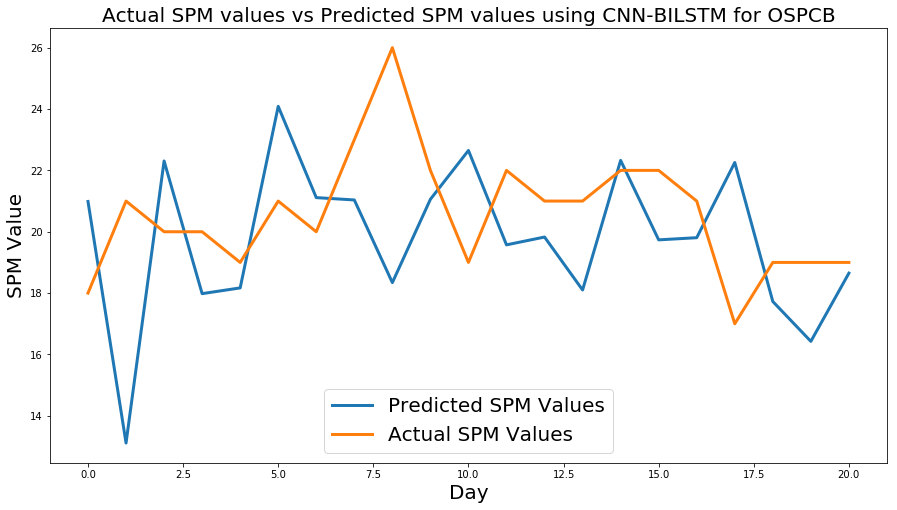

In [9]:
# fig, ax = plt.subplots()
plt.title('Actual SPM values vs Predicted SPM values using CNN-BILSTM for OSPCB', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('SPM Value', fontsize = 20)
plt.plot((yhat[0]*std_spm)+mean_spm, label = 'Predicted SPM Values', linewidth=3)
plt.plot((y_test*std_spm)+mean_spm, label = 'Actual SPM Values',  linewidth=3)
plt.legend(loc = 'lower center',frameon=True,  prop={"size":20});
plt.show()

In [10]:
x_new = []

for inp_val in X:
  x_input_new = inp_val.reshape((1, n_steps_in, n_features))
  y_newpred = model.predict(x_input_new, verbose = 1)
  x_new.append(y_newpred)
  
x_new = array(x_new)

1/1 [==============================] - 0s 5ms/step


In [11]:
x_new1 = x_new[:, 0, :]
x_new1.shape

(1278, 21)

In [12]:
print(x_new1.shape, y.shape)

(1278, 21) (1278, 21)


In [13]:
# from sklearn import svm
# from sklearn.svm import SVR

# svc = svm.SVC(kernel ='linear', C = 1).fit(x_ann_new, y)

# clf = SVR(C=1.0, epsilon=0.2)
# model_new = clf.fit(x_ann_new, y[:,0])

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

regr_multirf = MultiOutputRegressor(xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42))

#regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0))
regr_multirf.fit(x_new1, y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6),
           n_jobs=1)

In [56]:
from sklearn.externals import joblib 
path = "/content/drive/My Drive/model_cnnbilstm_SVR_OSPCB.pkl"  
# Save the model as a pickle in a file 
joblib.dump(regr_multirf, path)

['/content/drive/My Drive/model_cnnbilstm_SVR_OSPCB.pkl']

In [0]:
regr_multirf = joblib.load('/content/drive/My Drive/model_cnnbilstm_SVR_OSPCB.pkl')

In [14]:
y_test.shape
y_test_new = y_test.reshape(y_test.shape[0], -1)

y_test_new.shape
y_test

array([ 0.57253557,  1.12445974,  0.94048502,  0.94048502,  0.75651029,
        1.12445974,  0.94048502,  1.49240919,  2.04433336,  1.30843447,
        0.75651029,  1.30843447,  1.12445974,  1.12445974,  1.30843447,
        1.30843447,  1.12445974,  0.38856085,  0.75651029,  0.75651029,
        0.75651029])

In [15]:
y_test_new = y_test_new.T
y_test_new

array([[ 0.57253557,  1.12445974,  0.94048502,  0.94048502,  0.75651029,
         1.12445974,  0.94048502,  1.49240919,  2.04433336,  1.30843447,
         0.75651029,  1.30843447,  1.12445974,  1.12445974,  1.30843447,
         1.30843447,  1.12445974,  0.38856085,  0.75651029,  0.75651029,
         0.75651029]])

In [16]:
yhat_new = regr_multirf.predict(y_test_new)

In [17]:
print(yhat_new)
print(y_test_new)

[[ 0.63706988  1.09447551  1.0246892   0.95257813  0.85863131  1.10380793
   1.05981803  1.50505912  1.7529031   1.30111551  0.90435123  1.20087862
   1.06044984  1.09641838  1.3030827   1.28118372  1.14394093  0.34574974
   0.79591668  0.73366117  0.82315266]]
[[ 0.57253557  1.12445974  0.94048502  0.94048502  0.75651029  1.12445974
   0.94048502  1.49240919  2.04433336  1.30843447  0.75651029  1.30843447
   1.12445974  1.12445974  1.30843447  1.30843447  1.12445974  0.38856085
   0.75651029  0.75651029  0.75651029]]


In [18]:
#Denormalization
y_test_new = (y_test_new[0]*std_spm)+mean_spm 
yhat_new = (yhat_new[0]*std_spm)+mean_spm

In [19]:
print(yhat_new)
print(y_test_new)

[ 18.35077858  20.83702087  20.45769501  20.06573296  19.55508232
  20.88774681  20.64863777  23.06875992  24.41592216  21.96021652
  19.80359268  21.41537666  20.65207291  20.84757996  21.97090912
  21.85187721  21.10589027  16.76729965  19.21419525  18.87580299
  19.36223602]
[ 18.  21.  20.  20.  19.  21.  20.  23.  26.  22.  19.  22.  21.  21.  22.
  22.  21.  17.  19.  19.  19.]


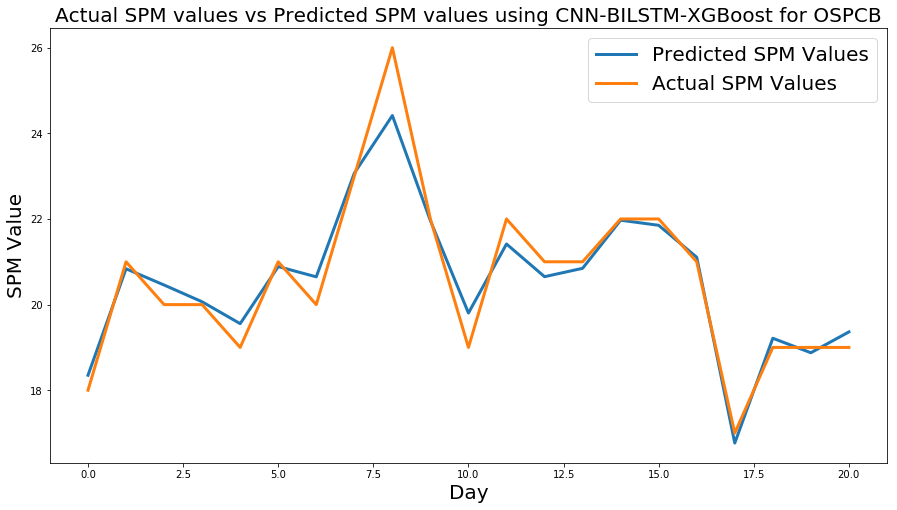

In [21]:
# fig, ax = plt.subplots()
plt.title('Actual SPM values vs Predicted SPM values using CNN-BILSTM-XGBoost for OSPCB', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('SPM Value', fontsize = 20)
plt.plot((yhat_new), label = 'Predicted SPM Values', linewidth=3)
plt.plot((y_test_new), label = 'Actual SPM Values', linewidth=3)
plt.legend(loc = 'upper right',frameon=True,  prop={"size":20});
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test_new, yhat_new))
print(rms_new)

mse_new = mean_squared_error(y_test_new, yhat_new)
print(mse_new)

mae_new = mean_absolute_error(y_test_new, yhat_new)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test_new, yhat_new)
print(mape_new)

0.4895563474926449
0.23966541737
0.340513138544
1.63091095501


In [23]:
import csv
with open('cnn_bilstm_xgboost_ospcb.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter = ',')
    writer.writerow(y_test_new)
    writer.writerow(yhat_new)